<a href="https://colab.research.google.com/github/md-abdullah-al-mamun-mojumder/Deep-Learning/blob/main/dropout_classification__irisdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [39]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris (2).csv


In [65]:
df = pd.read_csv('iris.csv')

In [66]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
df.shape

(150, 5)

In [68]:
df.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

In [69]:
# Extract features and labels
X = df[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']].values
y = df['class'].values

In [72]:
# Encode class labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convert categorical labels to integers

In [73]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [74]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:

# Define the neural network model with dropout
model = Sequential([
    Dense(128, input_dim=X.shape[1], activation="relu"),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(3, activation="softmax")  # 3 output neurons for 3 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:

# Compile the model
adam = Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [77]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, verbose=1)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.5664 - loss: 0.9763 - val_accuracy: 0.8750 - val_loss: 0.4502
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8164 - loss: 0.4849 - val_accuracy: 0.9167 - val_loss: 0.3298
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8750 - loss: 0.3347 - val_accuracy: 0.9167 - val_loss: 0.2876
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8711 - loss: 0.3196 - val_accuracy: 0.9167 - val_loss: 0.2454
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8971 - loss: 0.2562 - val_accuracy: 0.9583 - val_loss: 0.2278
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9583 - loss: 0.1739 - val_accuracy: 0.9167 - val_loss: 0.2607
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9271 - loss: 0.2177 - val_accuracy: 0.9583 - val_loss: 0.1581
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8997 - loss: 0.2160 - val_accuracy: 0.9167 - val_loss

Text(0.5, 1.0, 'Training & Validation Loss')

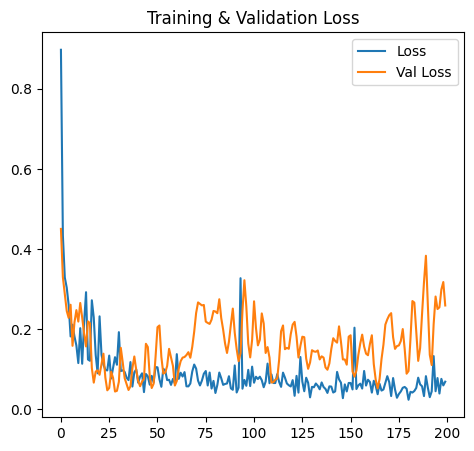

In [78]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Training & Validation Loss")

Text(0.5, 1.0, 'Training & Validation Accuracy')

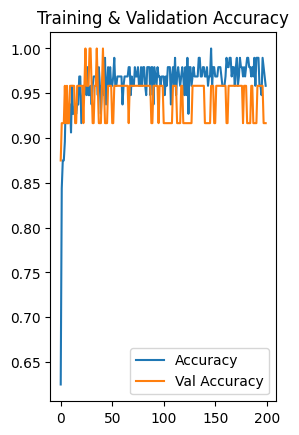

In [79]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")